# Black Hole formation

### This is a jupyter notebook. It allows you to run python code interactively, in separate cells each with their own output.

### This particular notebook is run on a remote cloud server, in this case a Binder environment, so that you don't need to worry about installing anything or configuring your software environment. The only requirment is access to the web.

In [61]:
%matplotlib inline

In [62]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import HBox, VBox, interact

from compasUtils import printCompasDetails

In [63]:
def get_data(index, isSingles=True, isCoarse=True):
    first = 'singles' if isSingles else 'binaries'
    second = 'coarse' if isCoarse else 'fine'
    return h5.File('data/{}/{}/Detailed_Output/BSE_Detailed_Output_{}.h5'.format(first, second, index))

In [64]:
# TODO give an introduction to single star evolution:
# Talk about how stars have several intrinsic properties: Mass, Radius, Luminosity, Effective Temperature, and Core Mass
# Talk about how stars evolve by fusing elements in their cores, growing the core mass
# As the stars age, all of these intrinsic properties will "evolve", similarly to a person growing from a baby to a child to an adult to an old person
# We break up the stars into different phases 

In [65]:
data = get_data(0)
print(data.keys())

<KeysViewHDF5 ['Age(1)', 'Age(2)', 'Ang_Momentum(1)', 'Ang_Momentum(2)', 'Ang_Momentum_Total', 'Dominant_Mass_Loss_Rate(1)', 'Dominant_Mass_Loss_Rate(2)', 'Eccentricity', 'Energy_Total', 'Luminosity(1)', 'Luminosity(2)', 'MT_History', 'Mass(1)', 'Mass(2)', 'Mass@ZAMS(1)', 'Mass@ZAMS(2)', 'Mass_0(1)', 'Mass_0(2)', 'Mass_CO_Core(1)', 'Mass_CO_Core(2)', 'Mass_Core(1)', 'Mass_Core(2)', 'Mass_Env(1)', 'Mass_Env(2)', 'Mass_He_Core(1)', 'Mass_He_Core(2)', 'Metallicity@ZAMS(1)', 'Metallicity@ZAMS(2)', 'Omega(1)', 'Omega(2)', 'Omega_Break(1)', 'Omega_Break(2)', 'Pulsar_Birth_Period(1)', 'Pulsar_Birth_Period(2)', 'Pulsar_Birth_Spin_Down(1)', 'Pulsar_Birth_Spin_Down(2)', 'Pulsar_Mag_Field(1)', 'Pulsar_Mag_Field(2)', 'Pulsar_Spin_Down(1)', 'Pulsar_Spin_Down(2)', 'Pulsar_Spin_Freq(1)', 'Pulsar_Spin_Freq(2)', 'Radius(1)', 'Radius(1)|RL', 'Radius(2)', 'Radius(2)|RL', 'Record_Type', 'RocheLobe(1)', 'RocheLobe(2)', 'SEED', 'SemiMajorAxis', 'Stellar_Type(1)', 'Stellar_Type(2)', 'Stellar_Type@ZAMS(1)', '

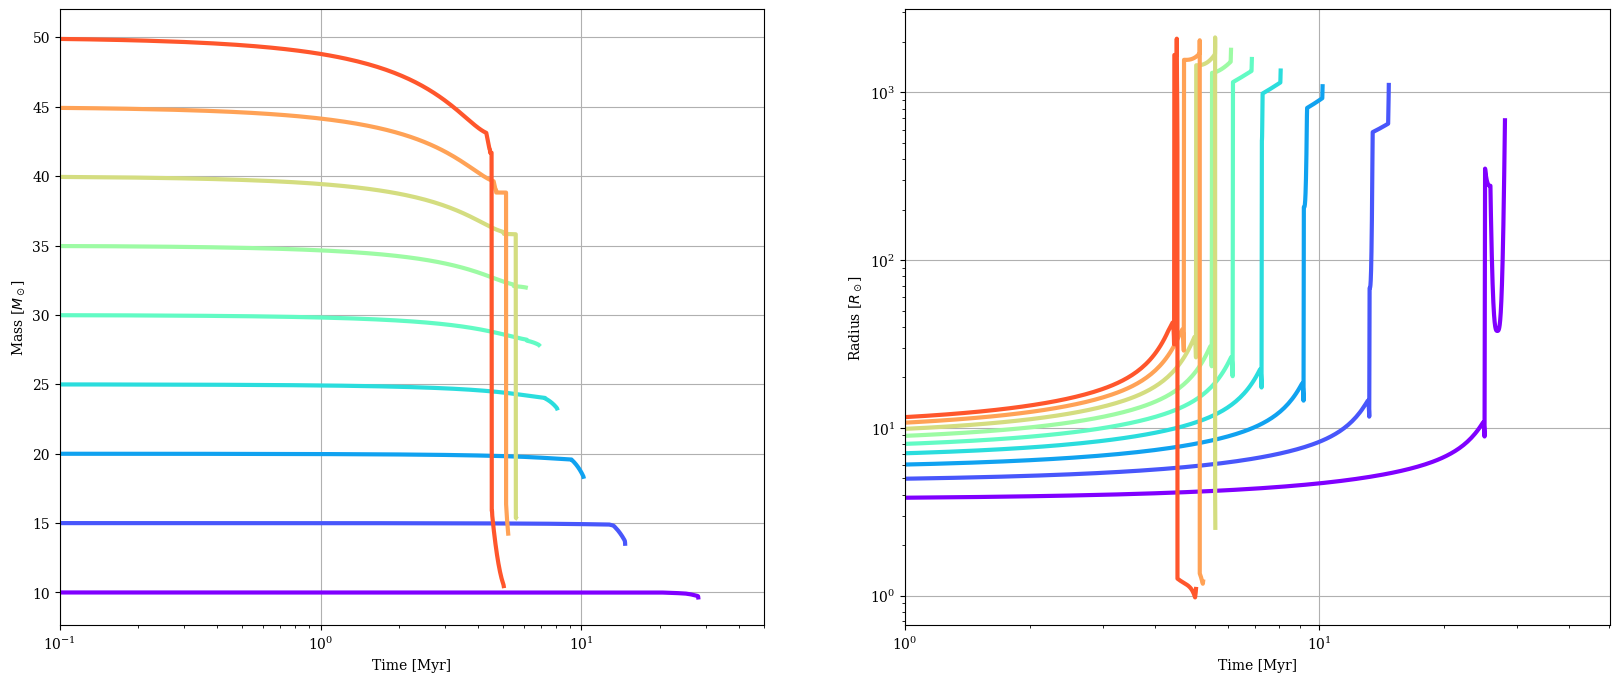

In [66]:
# Make plot of the evolution of the mass and radius with time

fig, axes = plt.subplots(ncols=2, figsize=(20, 8))

colormap = mpl.cm.rainbow

for index in range(9):

    # Pick out the correct data file
    data = get_data(index)

    # Extract the data from this file
    mass = data['Mass(1)'][()]
    radius = data['Radius(1)'][()]
    time = data['Time'][()]
    stellar_type = data['Stellar_Type(1)'][()]
    record_type = data['Record_Type'][()]

    # Create a mask, to show only the interesting parts of the data
    mask = record_type == 4 
    mask &= time < 1e3 #& (time > .01) 
    mask &= stellar_type < 10

    # Set the color of the line
    color=colormap(index/9)
    
    # First plot: Mass vs Time
    ax = axes[0]
    ax.plot(time[mask], mass[mask], color=color, lw=3)
    ax.set_xlabel('Time [Myr]')
    ax.set_ylabel('Mass [$M_\odot$]')
    ax.set_xscale('log')
    ax.set_xlim(left=.1)
    ax.grid()
    
    # Second plot: Radius vs Time
    ax = axes[1]
    ax.plot(time[mask], radius[mask])
    ax.plot(time[mask], radius[mask], color=color, lw=3)
    ax.set_xlabel('Time [Myr]')
    ax.set_ylabel('Radius [$R_\odot$]')
    ax.set_xscale('log')
    ax.set_xlim(left=1)
    ax.set_yscale('log')
    ax.grid()

In [99]:
#printCompasDetails(data)

# Want to extract arrays for time, Lum, and Teff, and make an HR based on this
isCoarse=True
N_simulations=9
upperLim = 9 if isCoarse else 100

#time = np.zeros((9, 100)) #get_data(0, isCoarse=isCoarse)['Time'][()].shape[0]))
Lum =  np.zeros((N_simulations, 100)) #get_data(0, isCoarse=isCoarse)['Time'][()].shape[0]))
Teff = np.zeros((N_simulations, 100)) #get_data(0, isCoarse=isCoarse)['Time'][()].shape[0]))


N_timesteps = 100
Teff_at_t = np.zeros(N_timesteps)
Lum_at_t =  np.zeros(N_timesteps)
LogTcuts = np.linspace(-2, 2, N_timesteps)
for idx_timestep in range(N_timesteps):
    Tcut =  np.power(10.0, LogTcuts[idx_timestep])
  
    for idx_star in range(N_simulations):
        # Pick out the correct data file
        data = get_data(idx_star, isCoarse=isCoarse)
    
        # Extract the data from this file
        record_type = data['Record_Type'][()]
        stellar_type = data['Stellar_Type(1)'][()]
        mask = (record_type == 4) & (stellar_type < 7)
        time = data['Time'][()][mask]
        idx_time = np.where(time < Tcut)[0][-1]
        #print(time[:10])
        #print(Tcut)
        #print(idx_time)
        
        Lum[idx_star, idx_timestep] = data['Luminosity(1)'][()][mask][idx_time]
        Teff[idx_star, idx_timestep] = data['Teff(1)'][()][mask][idx_time]
        
        #time[idx_star] = t[-1] # fill to last value
        #time[idx_star][:t.shape[0]] = t
        #l = data['Luminosity(1)'][()][mask]
        #Lum[idx_star] = l[-1] # fill to last value
        #Lum[idx_star][:l.shape[0]] = l
        #te = data['Teff(1)'][()][mask]
        #Teff[idx_star]= te[-1]
        #Teff[idx_star][:te.shape[0]] = te


    # Get an array of values at each timestep

    #time_pre = np.where(time < np.power(10.0, logTcut), time, 0)
    #max_t = np.max(time_pre, axis=1)
    #mask = np.where( time == max_t[:,None], True, False)
    #print(mask)

#Teff
#Lum 



In [100]:
def make_interactive_HR(iwidget=0):
    # widget spans 0 to N_timestps
    
    
    fig, ax = plt.subplots(figsize=(6, 4))

    #logTcut = LogTcut[iwidget]    
    #time_pre = np.where(time < np.power(10.0, logTcut), time, 0)
    #max_t = np.max(time_pre, axis=1)
    #mask = np.where( time == max_t[:,None], True, False)

    iwidget = int(iwidget)
    print(iwidget)
    ax.plot(Teff[:,iwidget], Lum[:,iwidget], 'bo')

    xlim = (1e3, 1e5) #ax.get_xlim()
    ylim = (1e3, 1e8) #ax.get_ylim()
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.invert_xaxis()
    ax.set_xlabel(r'Effective Temperature [T/K]')
    ax.set_ylabel(r'Luminosity [$L/L_\odot$]')
    ax.text(x=.95,y=.95,s=str(iwidget), transform=ax.transAxes)

   # Add lines of const radii
    for R in np.logspace(-1, 5, 7):
        #print(R)
        exp = "{:.2e}".format(R)
        #print(exp)
        #exp = exp[-3] + exp[-1]
        #if ((int(exp) % 2) == 1):  # skip odd ones to remove clutter
        #    continue
        T_K = np.logspace(3, 7, 41)  # in K
        T = T_K / 6e3  # Tsol=6e3K

        def get_L(t):  # assumes K
            return R * R * t * t * t * t

        L = get_L(T)
        ax.plot(T_K, L, '--k', alpha=0.2)
        # Plot the Rsol text at the bottom and right
        Lbot = ylim[0] * 8  # Lsun  -2
        Trgt = xlim[0] * 2  # 3e3
        Tbot = np.sqrt(np.sqrt(Lbot / (R * R))) * 6e3  # K
        Lrgt = get_L(Trgt / 6e3)
        alpha = 0.4
        s = "$10^{{{exp}}}R_\odot$".format(exp=exp[-1:])
        if (Tbot > Trgt) and (Tbot < xlim[1]):
            ax.text(x=Tbot, y=Lbot, s=s, alpha=alpha)
        elif (Lrgt > Lbot) and (Lrgt < ylim[1]):
            ax.text(x=Trgt, y=Lrgt, s=s, alpha=alpha)
            
    ax.set_xlim(xlim[::-1])
    ax.set_ylim(ylim)
#colormap = mpl.cm.rainbow

In [101]:
interact(make_interactive_HR, iwidget=widgets.FloatSlider(min=0, max=100, step=1))

interactive(children=(FloatSlider(value=0.0, description='iwidget', step=1.0), Output()), _dom_classes=('widge…

<function __main__.make_interactive_HR(iwidget=0)>

In [85]:
play = widgets.Play( value=0, min=0, max=100, step=1, interval=5, description="Press play", disabled=False, repeat=True )
#interact(make_interactive_HR, logTcut=widgets.Play( value=0, min=0, max=4, step=.1, interval=500, description="Press play", disabled=False ))
slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])

In [84]:
interact(make_interactive_HR, iwidget=widgets.Play( value=0, min=0, max=100, step=1, interval=5, description="Press play", disabled=False, repeat=True ))

interactive(children=(Play(value=0, description='Press play', interval=5, repeat=True), Output()), _dom_classe…

<function __main__.make_interactive_HR(iwidget=0)>